In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
## Reading Dataset

wine = pd.read_csv('wine.csv')

wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
wine.shape

(178, 14)

In [5]:
wine_new = wine.iloc[:, 1:]
wine_new

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
## Converting into an array
wine_df = wine_new.values
wine_df

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
## Normalizing the data
wine_norm = scale(wine_df)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
## Initializing PCA
pca = PCA(n_components= 5)
pca_values = pca.fit_transform(wine_norm)
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293])

In [9]:
## Creating Dataframe for top 3 PCA values
pca_df = pd.DataFrame(pca_values, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


In [10]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

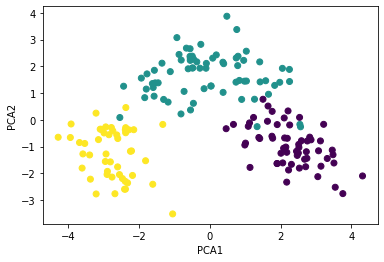

In [11]:
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c = wine['Type'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [12]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [13]:
## Cumulative Sum of top 3 variances
var_cumulative = np.cumsum(np.round(var, decimals= 3)*100)
var_cumulative

array([36.2, 55.4, 66.5, 73.6, 80.2])

In [14]:
wine_final = pd.concat([pd.DataFrame(pca_values[:, 0:3], columns= ['PCA1', 'PCA2', 'PCA3']), wine[['Type']]], axis=1)
wine_final

,PCA1,PCA2,PCA3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


## Hierarchical Clustering

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage

In [16]:
df = pca_df
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458


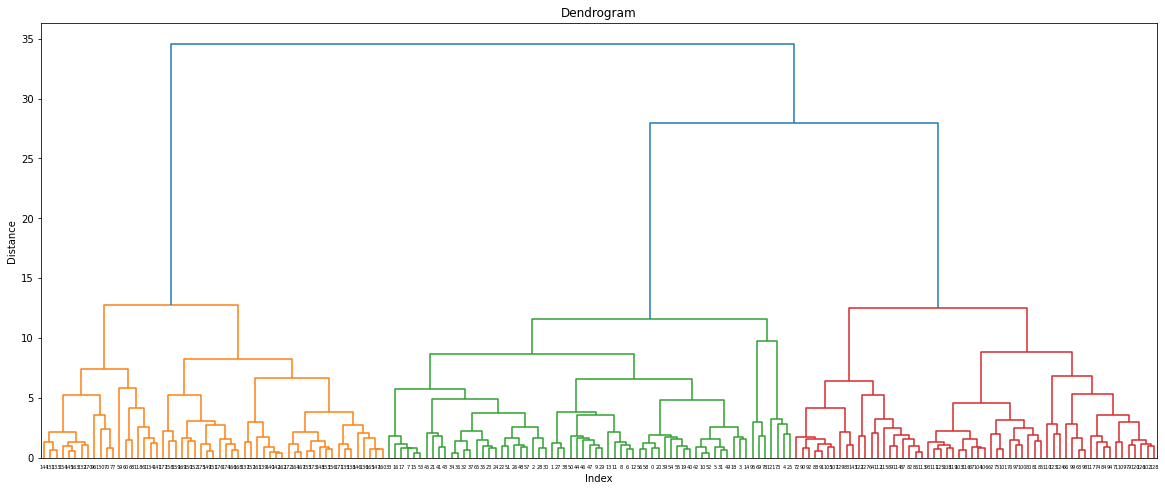

In [17]:
## Creating Dendrogram
x = linkage(df, method='ward', metric= 'euclidean')
plt.figure(figsize=(20,8))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(x,
              leaf_rotation=0,
              leaf_font_size=5,
              show_contracted= True)
plt.show()

In [18]:
h_pca = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit(pca_df)
cluster_labels = pd.Series(h_pca.labels_)
pca_df['Cluster'] = cluster_labels

In [19]:
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,0
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,2


In [20]:
pca_df_new = pd.concat([pca_df, wine[['Type']]], axis=1)
pca_df_new


,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,0,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,0,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,0,1
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,2,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,2,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,2,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,2,3


In [21]:
pd.set_option('display.max_rows', None)
pca_df_new[pca_df_new['Cluster']==0]

,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,0,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,0,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,0,1
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0,1
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,0,1
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,0,1
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,0,1
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0,1


In [22]:
pca_df_new[pca_df_new['Cluster']==1]

,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster,Type
59,-0.928582,3.073486,-4.585064,-1.051844,0.457124,1,2
60,-1.542480,1.381444,-0.874683,-2.890120,-0.978008,1,2
61,-1.836250,0.829984,-1.605702,-1.452105,-0.294076,1,2
62,0.030607,1.262786,-1.784408,-1.206576,-0.393604,1,2
67,0.183384,2.427146,-1.069746,0.127418,-0.534574,1,2
68,-0.812805,0.220514,-0.707005,-2.488990,-0.583560,1,2
75,-0.867993,2.444101,-1.563333,-0.831460,0.707980,1,2
76,0.370014,2.153907,-2.449386,-0.126159,0.095300,1,2
80,0.762064,3.375054,-0.357470,-0.366733,-0.154441,1,2
85,0.787905,2.026627,-0.254723,-0.809418,0.258853,1,2


In [23]:
pca_df_new[pca_df_new['Cluster']==2]

,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster,Type
83,-2.538977,0.087443,0.474251,0.758601,-1.127816,2,2
118,-2.433013,1.257141,-1.903027,0.869732,-0.468143,2,2
131,-2.384501,-0.374583,-0.723823,-0.308195,1.339632,2,3
132,-2.936940,-0.263862,-0.167640,-0.408773,1.087806,2,3
133,-2.146811,-0.368255,-0.453301,0.048528,1.726632,2,3
135,-3.063842,-0.353413,-1.099124,-0.740398,-0.737708,2,3
136,-3.915754,-0.154583,0.221828,-0.009068,-0.362729,2,3
137,-3.936463,-0.659687,1.712215,0.545484,-0.537325,2,3
138,-3.094276,-0.348843,-1.026831,-0.071349,-1.059350,2,3
139,-2.374472,-0.291980,1.241914,-0.748806,-0.415579,2,3


## K-Mean Clustering

In [24]:
df_k = pca_df.iloc[:, 0:3]
df_k

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


In [25]:
## Within Cluster Sum of Squares
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_k)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\rayad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1539.5034801883055,
 886.1611364823486,
 512.999506766151,
 429.628081908747,
 372.3099662174219,
 325.1955636191497,
 288.51360720213813,
 259.0292551435212,
 239.48135880332518,
 216.91783798885493]

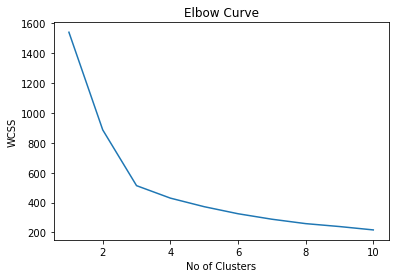

In [26]:
## Plotting Elbow Curve
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
## Identifying the Optimal K Value
from kneed import KneeLocator

y = wcss
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print(kn.knee)

3


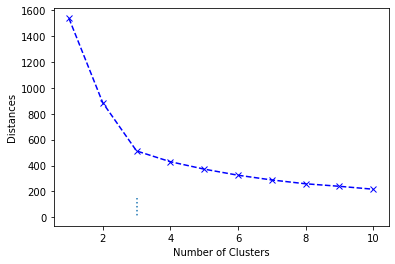

In [28]:
plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[0], plt.xlim()[1], linestyles='dotted')
plt.show()

In [29]:
Clusters_k = KMeans(3, random_state= 12)
Clusters_k.fit(df_k)

KMeans(n_clusters=3, random_state=12)

In [30]:
Clusters_k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [31]:
df_k['K Clusters'] = Clusters_k.labels_
df_k

,PCA1,PCA2,PCA3,K Clusters
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
5,3.050254,-2.122401,-0.629396,1
6,2.449090,-1.174850,-0.977095,1
7,2.059437,-1.608963,0.146282,1
8,2.510874,-0.918071,-1.770969,1
9,2.753628,-0.789438,-0.984247,1


In [32]:
df_k_final = pd.concat([df_k, wine[['Type']]], axis=1)
df_k_final

,PCA1,PCA2,PCA3,K Clusters,Type
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,1
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,1
5,3.050254,-2.122401,-0.629396,1,1
6,2.449090,-1.174850,-0.977095,1,1
7,2.059437,-1.608963,0.146282,1,1
8,2.510874,-0.918071,-1.770969,1,1
9,2.753628,-0.789438,-0.984247,1,1


In [33]:
df_k_final[df_k_final['K Clusters']==0]

,PCA1,PCA2,PCA3,K Clusters,Type
61,-1.836250,0.829984,-1.605702,0,2
83,-2.538977,0.087443,0.474251,0,2
118,-2.433013,1.257141,-1.903027,0,2
130,-1.327102,-0.170389,-1.180013,0,3
131,-2.384501,-0.374583,-0.723823,0,3
132,-2.936940,-0.263862,-0.167640,0,3
133,-2.146811,-0.368255,-0.453301,0,3
134,-2.369869,0.459635,-1.101400,0,3
135,-3.063842,-0.353413,-1.099124,0,3
136,-3.915754,-0.154583,0.221828,0,3


In [34]:
pd.set_option('display.max_rows', None)
df_k_final[df_k_final['K Clusters']==1]

,PCA1,PCA2,PCA3,K Clusters,Type
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,1
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,1
5,3.050254,-2.122401,-0.629396,1,1
6,2.449090,-1.174850,-0.977095,1,1
7,2.059437,-1.608963,0.146282,1,1
8,2.510874,-0.918071,-1.770969,1,1
9,2.753628,-0.789438,-0.984247,1,1


In [35]:
pd.set_option('display.max_rows', None)
df_k_final[df_k_final['K Clusters']==2]

,PCA1,PCA2,PCA3,K Clusters,Type
59,-0.928582,3.073486,-4.585064,2,2
60,-1.542480,1.381444,-0.874683,2,2
62,0.030607,1.262786,-1.784408,2,2
63,2.050262,1.925033,-0.007369,2,2
64,-0.609681,1.908059,0.679358,2,2
65,0.900228,0.763911,0.573361,2,2
66,2.248507,1.884592,-2.031840,2,2
67,0.183384,2.427146,-1.069746,2,2
68,-0.812805,0.220514,-0.707005,2,2
69,1.975620,1.403283,-1.238276,2,2
